In [1]:
using Plots
using Interact
using ProgressMeter
pyplot()
n = 360
prog = Progress(n,1)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-15409498785232348252\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8386100550124651287\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/110f8bd2edd49b273bcc7a0e5f770ea975ef0a51-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-15409498785232348252\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

Progress(360, 1.0, 0, 1.56048704500612e9, 1.56048704500612e9, false, "Progress: ", 41, BarGlyphs('|', '█', ['▏', '▎', '▍', '▌', '▋', '▊', '▉'], ' ', '|'), :green, IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(0x0000002c) open, 0 bytes waiting))), 0, 0)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:38


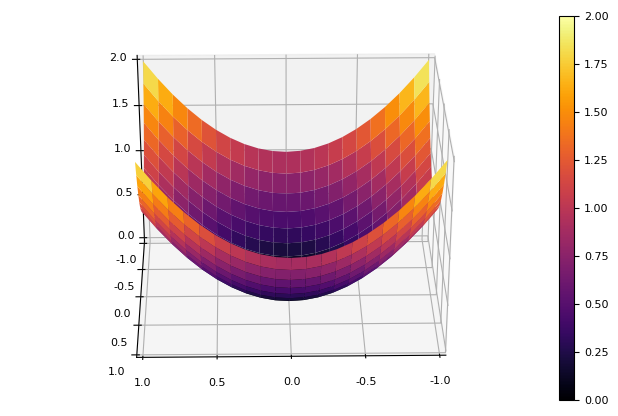

┌ Info: Saved animation to 
│   fn = /mnt/c/Users/kent/notebooks/julia/tmp.gif
└ @ Plots /home/kent/.julia/packages/Plots/oiirH/src/animation.jl:90


Plots.AnimatedGif("/mnt/c/Users/kent/notebooks/julia/tmp.gif")

In [6]:
let
function test()
    @gif for θ in -180:179
        x = y = -1:0.1:1
        f(x, y) = x ^ 2 + y^2
        z = f.(x', y)
        surface(x, y, z, camera = (θ, 30))
            
        next!(prog)
    #         grid3d(1,1,1)
    end
end
test()
end

search:

Couldn't find displayfile
Perhaps you meant displayable, displaysize or display


No documentation found.

Binding `displayfile` does not exist.


In [3]:
?display

search: display displaysize displayable redisplay popdisplay pushdisplay



```
display(x)
display(d::AbstractDisplay, x)
display(mime, x)
display(d::AbstractDisplay, mime, x)
```

AbstractDisplay `x` using the topmost applicable display in the display stack, typically using the richest supported multimedia output for `x`, with plain-text [`stdout`](@ref) output as a fallback. The `display(d, x)` variant attempts to display `x` on the given display `d` only, throwing a [`MethodError`](@ref) if `d` cannot display objects of this type.

In general, you cannot assume that `display` output goes to `stdout` (unlike [`print(x)`](@ref) or [`show(x)`](@ref)).  For example, `display(x)` may open up a separate window with an image. `display(x)` means "show `x` in the best way you can for the current output device(s)." If you want REPL-like text output that is guaranteed to go to `stdout`, use [`show(stdout, "text/plain", x)`](@ref) instead.

There are also two variants with a `mime` argument (a MIME type string, such as `"image/png"`), which attempt to display `x` using the requested MIME type *only*, throwing a `MethodError` if this type is not supported by either the display(s) or by `x`. With these variants, one can also supply the "raw" data in the requested MIME type by passing `x::AbstractString` (for MIME types with text-based storage, such as text/html or application/postscript) or `x::Vector{UInt8}` (for binary MIME types).


In [4]:
?show

search: show showable showerror showtheme showtheme! showlibrary showlibrary!



```
show(x)
```

Write an informative text representation of a value to the current output stream. New types should overload `show(io, x)` where the first argument is a stream. The representation used by `show` generally includes Julia-specific formatting and type information.

---

```
show(io, mime, x)
```

The [`display`](@ref) functions ultimately call `show` in order to write an object `x` as a given `mime` type to a given I/O stream `io` (usually a memory buffer), if possible. In order to provide a rich multimedia representation of a user-defined type `T`, it is only necessary to define a new `show` method for `T`, via: `show(io, ::MIME"mime", x::T) = ...`, where `mime` is a MIME-type string and the function body calls [`write`](@ref) (or similar) to write that representation of `x` to `io`. (Note that the `MIME""` notation only supports literal strings; to construct `MIME` types in a more flexible manner use `MIME{Symbol("")}`.)

For example, if you define a `MyImage` type and know how to write it to a PNG file, you could define a function `show(io, ::MIME"image/png", x::MyImage) = ...` to allow your images to be displayed on any PNG-capable `AbstractDisplay` (such as IJulia). As usual, be sure to `import Base.show` in order to add new methods to the built-in Julia function `show`.

The default MIME type is `MIME"text/plain"`. There is a fallback definition for `text/plain` output that calls `show` with 2 arguments. Therefore, this case should be handled by defining a 2-argument `show(io::IO, x::MyType)` method.

Technically, the `MIME"mime"` macro defines a singleton type for the given `mime` string, which allows us to exploit Julia's dispatch mechanisms in determining how to display objects of any given type.

The first argument to `show` can be an [`IOContext`](@ref) specifying output format properties. See [`IOContext`](@ref) for details.
